In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns', None)

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
data = pd.read_csv("C:\\My Computer\\Documents\\Excler\\Project 1\\Bookings.csv")
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
data.shape

(119390, 32)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## Missing Values

In [5]:
#Checking percentage of nan values present in each feature
features_with_na = [features for features in data.columns if data[features].isnull().sum()>1]

#print feature name and percentage of missing values
for feature in features_with_na:
    print(feature, np.round(data[feature].isnull().mean(), 4), '% missing values')

children 0.0 % missing values
country 0.0041 % missing values
agent 0.1369 % missing values
company 0.9431 % missing values


In [6]:
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

<AxesSubplot:>

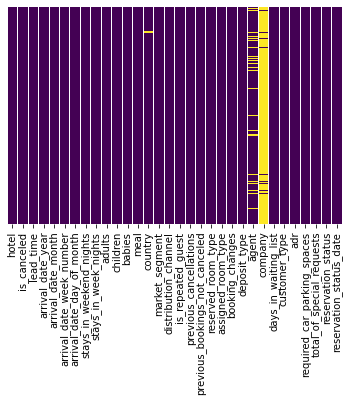

In [7]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [8]:
data1 = data.copy()
data1 = data1.drop(['company'], axis=1)

In [9]:
data1.children.value_counts()

0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

In [10]:
data1['children'].fillna(data1.children.mode()[0],inplace=True)

In [11]:
#changing the datatype of children from float to integer
data1['children'] = data1['children'].astype('int64')

In [12]:
data1.agent.value_counts()

9.0      31961
240.0    13922
1.0       7191
14.0      3640
7.0       3539
         ...  
304.0        1
431.0        1
278.0        1
450.0        1
114.0        1
Name: agent, Length: 333, dtype: int64

In [13]:
data1['agent'].fillna(value=0, inplace = True)

In [14]:
#changing the datatype of agent from float to integer
data1['agent'] = data1['agent'].astype('int64')

In [15]:
data1.country.value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
SDN        1
BFA        1
NAM        1
MMR        1
DJI        1
Name: country, Length: 177, dtype: int64

In [16]:
data1['country'].fillna(data1.country.mode()[0],inplace=True)

In [17]:
data1.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

## Handling Duplicates and other Anomalies

In [18]:
data1.duplicated().sum()

32020

In [19]:
data1[data1.duplicated()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,0,Transient,98.00,0,1,Check-Out,2015-07-03
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,0,0,BB,PRT,Direct,Direct,0,0,0,A,A,1,No Deposit,250,0,Transient,84.67,0,1,Check-Out,2015-07-07
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,0,0,HB,ROU,Direct,Direct,0,0,0,E,E,0,No Deposit,250,0,Transient,137.00,0,1,Check-Out,2015-07-07
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,0,0,BB,PRT,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,240,0,Transient,97.00,0,0,Canceled,2015-07-01
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,0,Transient,109.80,0,3,Check-Out,2015-07-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,0,186,2017,August,35,31,0,3,2,0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9,0,Transient,126.00,0,2,Check-Out,2017-09-03
119352,City Hotel,0,63,2017,August,35,31,0,3,3,0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119353,City Hotel,0,63,2017,August,35,31,0,3,3,0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119354,City Hotel,0,63,2017,August,35,31,0,3,3,0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03


In [20]:
data1.drop_duplicates(inplace=True)

In [21]:
# combining adults, babies and children into one "guest" column
data1['guests'] = data1['adults'] + data1['children'] + data1['babies']

In [22]:
# dropping adults, babies and children columns to remove any redundancies
data1 = data1.drop(['adults','children','babies'], axis=1)

In [23]:
# dropping the rows where guests = 0
data1.drop(index = data1[data1['guests']==0].index, inplace=True)

In [24]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87204 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87204 non-null  object 
 1   is_canceled                     87204 non-null  int64  
 2   lead_time                       87204 non-null  int64  
 3   arrival_date_year               87204 non-null  int64  
 4   arrival_date_month              87204 non-null  object 
 5   arrival_date_week_number        87204 non-null  int64  
 6   arrival_date_day_of_month       87204 non-null  int64  
 7   stays_in_weekend_nights         87204 non-null  int64  
 8   stays_in_week_nights            87204 non-null  int64  
 9   meal                            87204 non-null  object 
 10  country                         87204 non-null  object 
 11  market_segment                  87204 non-null  object 
 12  distribution_channel           

## Handling Outliers

In [26]:
data2 = data1.copy()
data2.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,guests
count,87204.000000,87204.000000,87204.000000,87204.000000,87204.000000,87204.000000,87204.000000,87204.000000,87204.000000,87204.000000,87204.000000,87204.000000,87204.000000,87204.000000,87204.000000,87204.000000,87204.000000
mean,0.275308,79.991399,2016.210346,26.836292,15.815651,1.004793,2.624329,0.038576,0.030411,0.184109,0.268566,81.095833,0.746514,106.527792,0.084331,0.699005,2.029311
std,0.446672,86.062819,0.686077,13.667844,8.835240,1.027460,2.039935,0.192584,0.369399,1.733289,0.710720,109.973135,10.002483,54.881424,0.281697,0.832051,0.790128
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,1.000000
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,72.250000,0.000000,0.000000,2.000000
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,98.250000,0.000000,0.000000,2.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,240.000000,0.000000,134.100000,0.000000,1.000000,2.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,1.000000,26.000000,72.000000,18.000000,535.000000,391.000000,5400.000000,8.000000,5.000000,55.000000


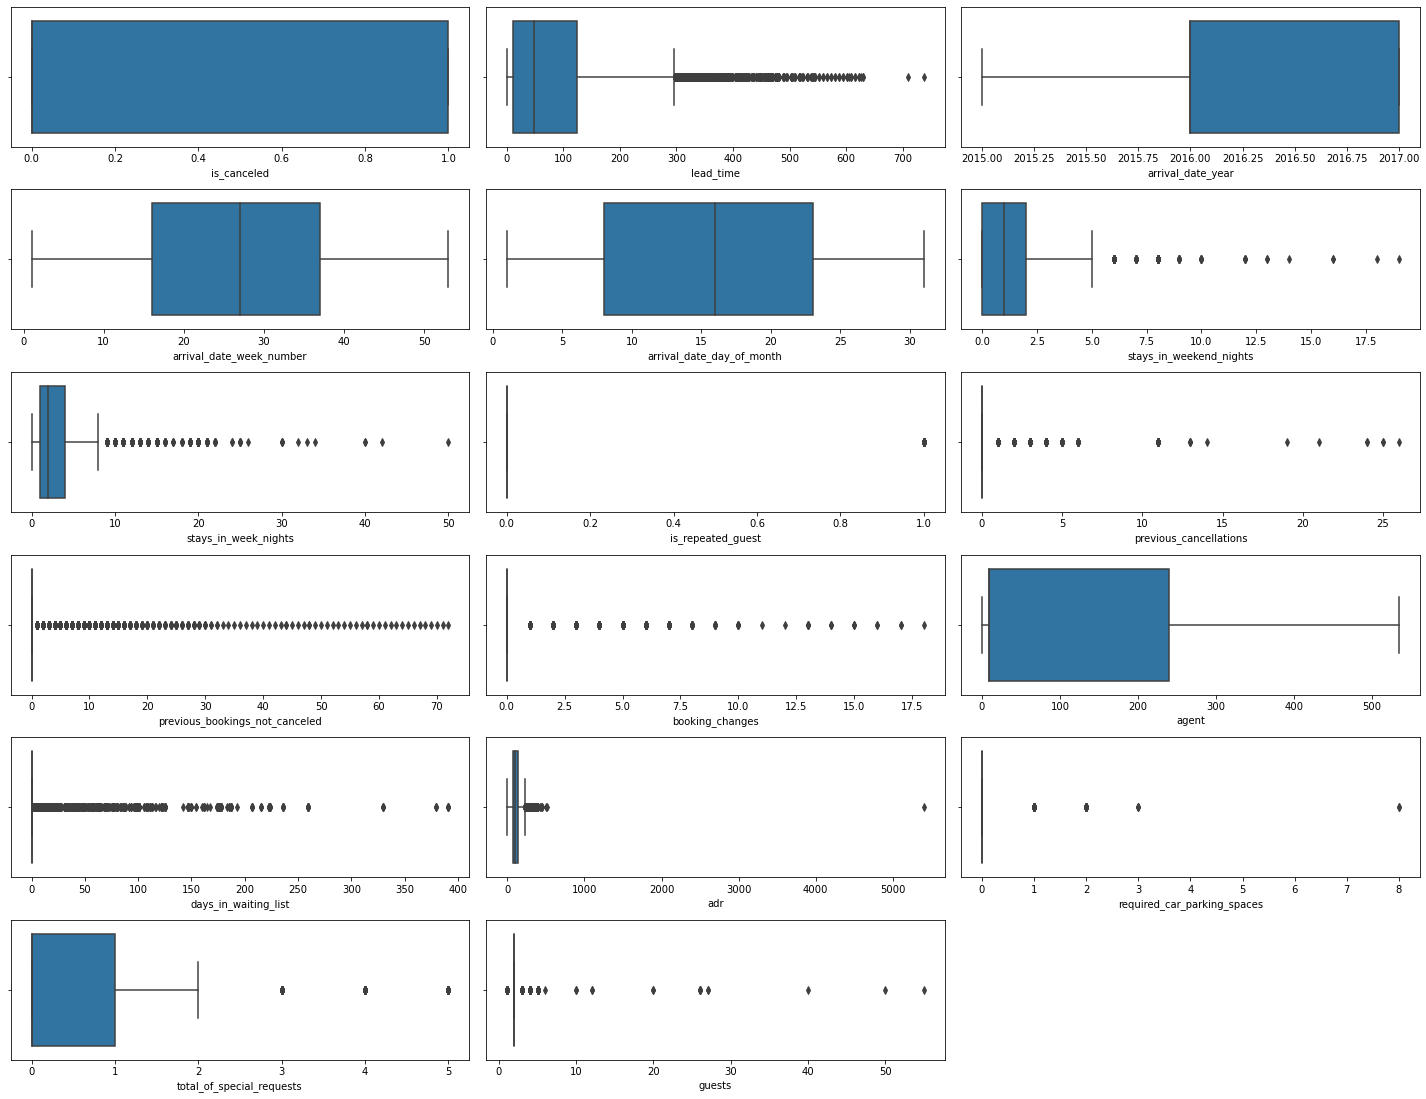

In [27]:
plt.figure(figsize=(20,20))
x=1
for column in data2.describe().columns:
    plt.subplot(8,3,x)
    sns.boxplot(data2[column])
    x+=1
plt.tight_layout()

#### lead_time

In [28]:
data2.lead_time.describe()

count    87204.000000
mean        79.991399
std         86.062819
min          0.000000
25%         11.000000
50%         49.000000
75%        125.000000
max        737.000000
Name: lead_time, dtype: float64

In [29]:
Q1_lt = data2.lead_time.quantile(0.25)
Q3_lt = data2.lead_time.quantile(0.75)
Q1_lt, Q3_lt

(11.0, 125.0)

In [30]:
IQR_lt = Q3_lt - Q1_lt
IQR_lt

114.0

In [31]:
lower_limit_lt = Q1_lt - (1.5*IQR_lt)
upper_limit_lt = Q3_lt + (1.5*IQR_lt)
lower_limit_lt, upper_limit_lt

(-160.0, 296.0)

In [32]:
data2['lead_time'] = np.where(data2['lead_time'] > upper_limit_lt, upper_limit_lt, data2['lead_time'])

#### stays_in_weekend_nights

In [33]:
data2.stays_in_weekend_nights.describe()

count    87204.000000
mean         1.004793
std          1.027460
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max         19.000000
Name: stays_in_weekend_nights, dtype: float64

In [34]:
Q1_wknd = data2.stays_in_weekend_nights.quantile(0.25)
Q3_wknd = data2.stays_in_weekend_nights.quantile(0.75)
Q1_wknd, Q3_wknd

(0.0, 2.0)

In [35]:
IQR_wknd = Q3_wknd - Q1_wknd
IQR_wknd

2.0

In [36]:
lower_limit_wknd = Q1_wknd - (1.5*IQR_wknd)
upper_limit_wknd = Q3_wknd + (1.5*IQR_wknd)
lower_limit_wknd, upper_limit_wknd

(-3.0, 5.0)

In [37]:
data2['stays_in_weekend_nights'] = np.where(data2['stays_in_weekend_nights'] > upper_limit_wknd, upper_limit_wknd, data2['stays_in_weekend_nights'])

#### stays_in_week_nights

In [38]:
data2.stays_in_week_nights.describe()

count    87204.000000
mean         2.624329
std          2.039935
min          0.000000
25%          1.000000
50%          2.000000
75%          4.000000
max         50.000000
Name: stays_in_week_nights, dtype: float64

In [39]:
Q1_wk = data2.stays_in_week_nights.quantile(0.25)
Q3_wk = data2.stays_in_week_nights.quantile(0.75)
Q1_wk, Q3_wk

(1.0, 4.0)

In [40]:
IQR_wk = Q3_wk - Q1_wk
IQR_wk

3.0

In [41]:
lower_limit_wk = Q1_wk - (1.5*IQR_wk)
upper_limit_wk = Q3_wk + (1.5*IQR_wk)
lower_limit_wk, upper_limit_wk

(-3.5, 8.5)

In [42]:
data2['stays_in_week_nights'] = np.where(data2['stays_in_week_nights'] > upper_limit_wk, upper_limit_wk, data2['stays_in_week_nights'])

#### adr

In [43]:
data2.adr.describe()

count    87204.000000
mean       106.527792
std         54.881424
min         -6.380000
25%         72.250000
50%         98.250000
75%        134.100000
max       5400.000000
Name: adr, dtype: float64

In [44]:
Q1_adr = data2.adr.quantile(0.25)
Q3_adr = data2.adr.quantile(0.75)
Q1_adr, Q3_adr

(72.25, 134.1)

In [45]:
IQR_adr = Q3_adr - Q1_adr
IQR_adr

61.849999999999994

In [46]:
lower_limit_adr = Q1_adr - (1.5*IQR_adr)
upper_limit_adr = Q3_adr + (1.5*IQR_adr)
lower_limit_adr, upper_limit_adr

(-20.52499999999999, 226.875)

In [47]:
data2['adr'] = np.where(data2['adr'] > upper_limit_adr, upper_limit_adr, data2['adr'])

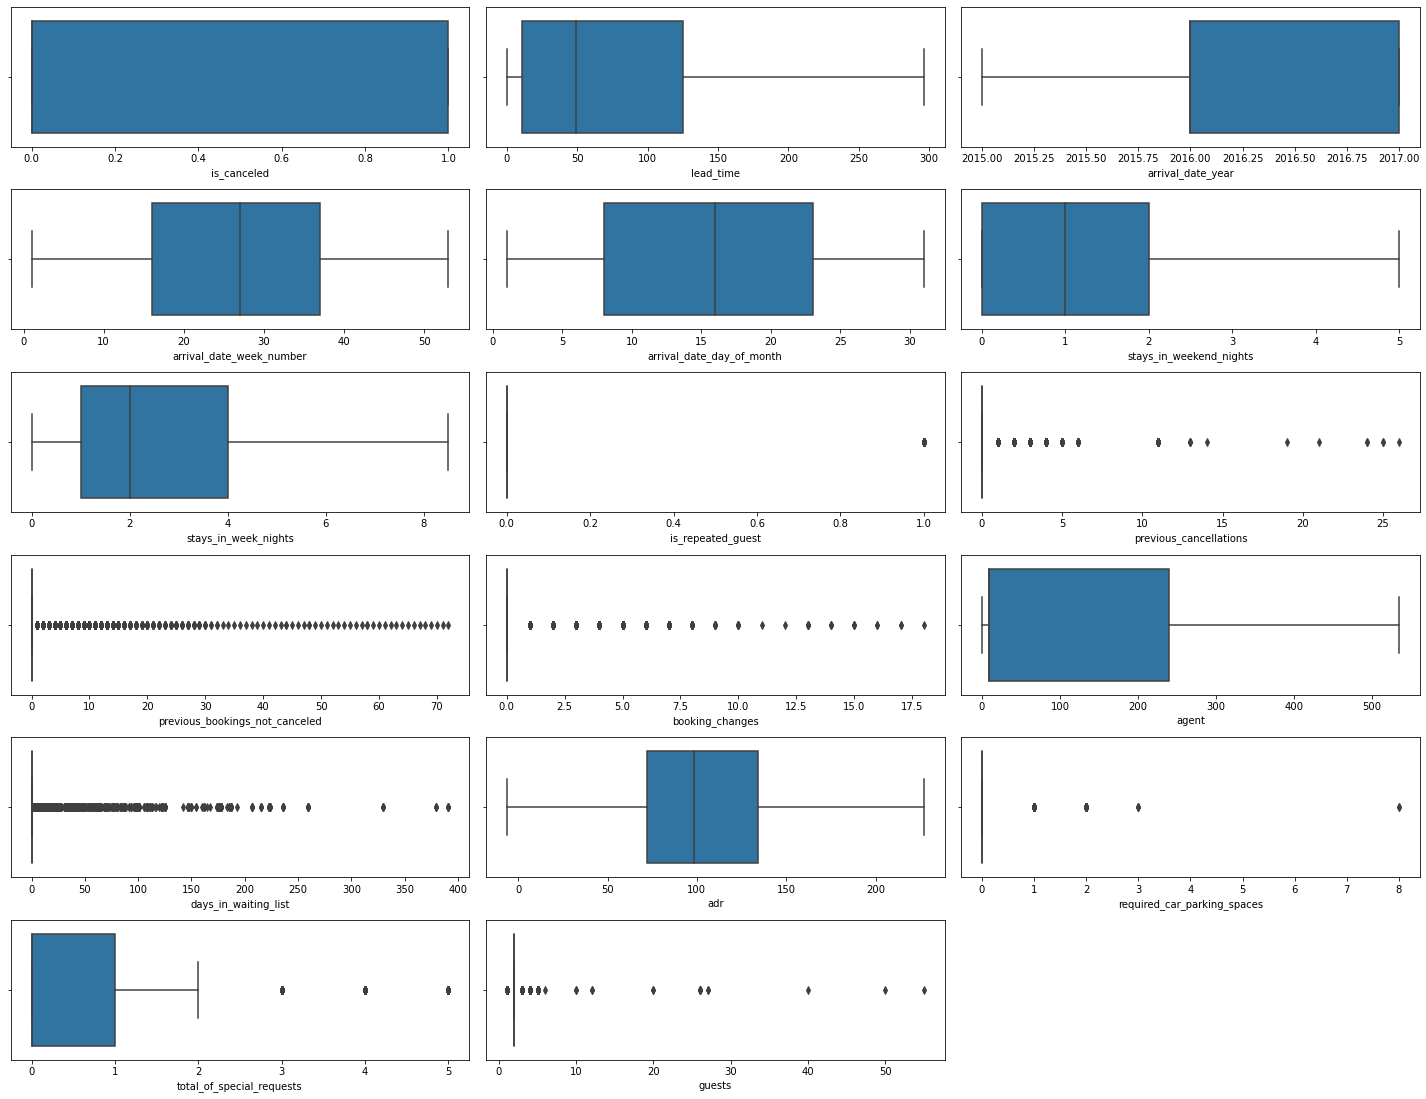

In [48]:
plt.figure(figsize=(20,20))
x=1
for column in data2.describe().columns:
    plt.subplot(8,3,x)
    sns.boxplot(data2[column])
    x+=1
plt.tight_layout()